# Simulation probabiliste

Importons d'abord les modules `random` et `numpy.random`, ainsi que `numpy` et `matplotlib`

In [11]:
import random as rd
import numpy.random as npr
import matplotlib.pyplot as plt
import numpy as np

## Différentes lois de probabilité

Dans cette partie, nous allons faire ensemble quelques expérimentations pour nous faire la main.

### Tirage d'entiers équiprobables entre 1 et 6

On veut simuler le tirage de N dés équilibrés, et afficher les fréquences d'apparition des différentes faces.

Commençons par utiliser le module `random` et effectuons une boucle simulant les N tirages :

In [12]:
def lancer_des(N):
    compteurs = [0]*6
    for k in range(1000000):
        i = rd.randint(1,6)
        compteurs[i-1] += 1
        frequences = [x/N for x in compteurs]
    plt.bar(range(1,7),frequences)

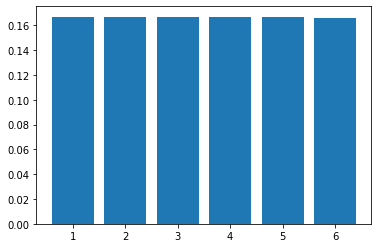

In [13]:
lancer_des(1000000)

Utilisons maintenant `numpy` :

In [14]:
def lancer_des_numpy(N):
    x = npr.randint(1,7,N)
    compteurs = [np.count_nonzero(x == i) for i in range(1,7)]
    frequences = [x/N for x in compteurs]
    plt.bar(range(1,7),frequences)


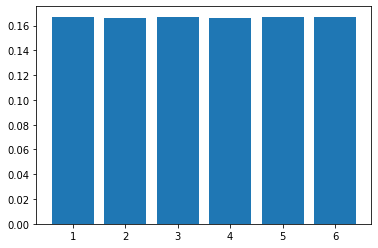

In [15]:
lancer_des_numpy(1000000)

### La loi de Bernoulli de paramètre $p$

Une variable aléatoire suit la loi de Bernoulli de paramètre $p$ si elle vaut 1 avec probabilité $p$ et 0 avec probabilité $1-p$.

On tire un nombre aléatoire uniforme dans $x\in [0,1]$, et la variable aléatoire vaut 1 si $x<p$ et 0 sinon.

Programmons ceci en faisant une boucle python :

In [16]:
def bernoulli(p,N):
    """
    Fabrique un tableau numpy de taille N, contenant N tirages de 
    Bernoulli de paramètre p
    """
    x = npr.rand(N)
    for i in range(N):
        if x[i] < p:
            x[i] = 1
        else:
            x[i] = 0
    return x

Une petite astuce : si $X$ suit une loi uniforme sur $[0,1]$, alors la partie entière $\lfloor p+X \rfloor$ suit la loi de Bernoulli de paramètre $p$.

Ceci permet d'utiliser facilement `numpy` :

In [17]:
def bernoulli2(p,N):
    x = npr.rand(N)
    return np.floor(p+x)

On a appris que  l'espérance et la variance de la loi binomiale valent respectivement $p$ et $p(1-p)$. 

Vérifions-le en calculant la moyenne emprique et la variance empirique d'un grand échantillon :

In [60]:
p = 1/3
N = 10000000
x = bernoulli2(p,N)
print("Moyenne :", np.mean(x))  # on attend 1/3
print("Variance :", np.var(x))  # on attend 2/9

Moyenne : 0.3331547
Variance : 0.22216264586790968


### La loi de Gauss ou loi normale

In [18]:
x = npr.normal(0,1,100000)

L'histogramme normé (option `denisty = True`) de répartitition de ce vecteur Gaussien

(array([2.86875332e-04, 1.72125199e-04, 1.72125199e-04, 8.03250929e-04,
        1.37700159e-03, 2.12287746e-03, 4.64738038e-03, 6.99975810e-03,
        1.12455130e-02, 1.62945189e-02, 3.02940350e-02, 4.28017995e-02,
        5.88668181e-02, 8.17594696e-02, 1.08324125e-01, 1.43036040e-01,
        1.82223211e-01, 2.25541386e-01, 2.64097431e-01, 3.03341976e-01,
        3.41381645e-01, 3.62094044e-01, 3.89347200e-01, 3.96060083e-01,
        3.92215954e-01, 3.75290309e-01, 3.48151903e-01, 3.22160998e-01,
        2.82629577e-01, 2.39655652e-01, 2.02820860e-01, 1.61281312e-01,
        1.25651395e-01, 9.66196118e-02, 7.12024574e-02, 5.11785592e-02,
        3.56872913e-02, 2.16304000e-02, 1.42863915e-02, 9.98326155e-03,
        6.08175704e-03, 3.32775385e-03, 2.06550239e-03, 1.20487639e-03,
        6.31125730e-04, 1.72125199e-04, 1.14750133e-04, 1.14750133e-04,
        0.00000000e+00, 5.73750664e-05]),
 array([-4.14163987, -3.96734813, -3.79305639, -3.61876466, -3.44447292,
        -3.27018118, 

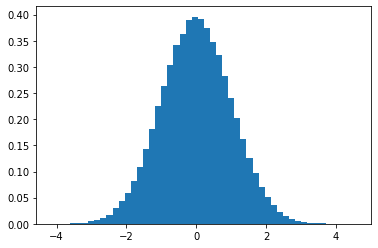

In [19]:
plt.hist(x,50,density=True)

L'histogramme cumulatife (option `cumulative = True`). On trouve la fonction de répartition de la loi de probabilités.

(array([5.0000e-05, 8.0000e-05, 1.1000e-04, 2.5000e-04, 4.9000e-04,
        8.6000e-04, 1.6700e-03, 2.8900e-03, 4.8500e-03, 7.6900e-03,
        1.2970e-02, 2.0430e-02, 3.0690e-02, 4.4940e-02, 6.3820e-02,
        8.8750e-02, 1.2051e-01, 1.5982e-01, 2.0585e-01, 2.5872e-01,
        3.1822e-01, 3.8133e-01, 4.4919e-01, 5.1822e-01, 5.8658e-01,
        6.5199e-01, 7.1267e-01, 7.6882e-01, 8.1808e-01, 8.5985e-01,
        8.9520e-01, 9.2331e-01, 9.4521e-01, 9.6205e-01, 9.7446e-01,
        9.8338e-01, 9.8960e-01, 9.9337e-01, 9.9586e-01, 9.9760e-01,
        9.9866e-01, 9.9924e-01, 9.9960e-01, 9.9981e-01, 9.9992e-01,
        9.9995e-01, 9.9997e-01, 9.9999e-01, 9.9999e-01, 1.0000e+00]),
 array([-4.14163987, -3.96734813, -3.79305639, -3.61876466, -3.44447292,
        -3.27018118, -3.09588945, -2.92159771, -2.74730597, -2.57301423,
        -2.3987225 , -2.22443076, -2.05013902, -1.87584728, -1.70155555,
        -1.52726381, -1.35297207, -1.17868033, -1.0043886 , -0.83009686,
        -0.65580512, -0.48

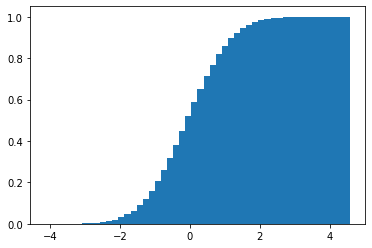

In [20]:
plt.hist(x,50,cumulative=True,density=True)

## Exercices

### Le paradoxe du Duc De Toscane

Le Grand Duc de Toscane avait remarqué que, bien qu'il y ait autant de façons d'écrire 9 et 10 comme somme de 3 nombres compris entre 1 et 6, on obtient plus souvent un total de 10 lorsqu'on lance 3 dés. Galilée lui donna vers 1620 une explication de ce paradoxe. Galilée est alors Premier Mathématicien de l’Université de Pise et Premier Philosophe du Grand Duc à Florence). Galilée est ainsi l’un des premiers avec Cardan à avoir écrit sur le « calcul des hasards », mais leurs écrits n’ont été publiés qu’après la célèbre correspondance entre Pascal et Fermat qui marque « officiellement » le début de la théorie des probabilités. Le mémoire de Galilée qui nous intéresse n’a été édité qu’en 1718.

Écrivons une fonction qui simule N tirages de 3 dés, et affiche les pourcentages d'obtention de 9 et 10.

In [56]:
def toscane(N):
    X = npr.randint(1,7,N) + npr.randint(1,7,N) + npr.randint(1,7,N)
    nb9 = np.count_nonzero(X == 9)
    nb10 = np.count_nonzero(X == 10)
    print(f"9 a été obtenu dans {100*nb9/N} % des cas")
    print(f"10 a été obtenu dans {100*nb10/N} % des cas")

et testons sur 1000000 tirages :

In [58]:
toscane(1000000)

9 a été obtenu dans 11.5454 % des cas
10 a été obtenu dans 12.5712 % des cas


Ceci corrobore l'observation du Duc de Toscane.

Maintenant, comptons le nombre de façon d'écrire un nombre comme somme de trois entiers compris entre 1 et 6 :

In [23]:
def ecriture(n):
    compte = 0
    for i in range(1,7):
        for j in range(i,7):
            for k in range(j,7):
                if i +j+k == n:
                    print(f"{i}+{j}+{k}={n}")
                    compte += 1
    print(f"{n} s'écrit donc de {compte} façons comme somme de trois entiers entre 1 et 6")

In [24]:
ecriture(9)
ecriture(10)

1+2+6=9
1+3+5=9
1+4+4=9
2+2+5=9
2+3+4=9
3+3+3=9
9 s'écrit donc de 6 façons comme somme de trois entiers entre 1 et 6
1+3+6=10
1+4+5=10
2+2+6=10
2+3+5=10
2+4+4=10
3+3+4=10
10 s'écrit donc de 6 façons comme somme de trois entiers entre 1 et 6


C'est là le paradoxe : les deux nombres s'écrivent chacun du même nombre de façons, et pourtant 10 apparait plus souvent que 9. On voit ici que le Duc de Toscane avait déjà des notions de calcul des probabilités. mais son erreur est de regarder les écritures non ordonnées, alors que ce qui compte ici, ce sont les écitures ordonnées.

Il ne s'agit pas d'un vrai paradoxe, mettant en jeu la cohérence des mathématiques, juste une erreur de compréhension d'un phénomène mathématique.

In [25]:
def ecriture_ordonnee(n):
    compte = 0
    for i in range(1,7):
        for j in range(1,7):
            for k in range(1,7):
                if i + j + k == n:
                    print(f"{i}+{j}+{k}={n}")
                    compte += 1
    print(f"{n} s'écrit donc de {compte} façons comme somme ordonnée de trois entiers entre 1 et 6")

In [26]:
ecriture_ordonnee(9)
ecriture_ordonnee(10)

1+2+6=9
1+3+5=9
1+4+4=9
1+5+3=9
1+6+2=9
2+1+6=9
2+2+5=9
2+3+4=9
2+4+3=9
2+5+2=9
2+6+1=9
3+1+5=9
3+2+4=9
3+3+3=9
3+4+2=9
3+5+1=9
4+1+4=9
4+2+3=9
4+3+2=9
4+4+1=9
5+1+3=9
5+2+2=9
5+3+1=9
6+1+2=9
6+2+1=9
9 s'écrit donc de 25 façons comme somme ordonnée de trois entiers entre 1 et 6
1+3+6=10
1+4+5=10
1+5+4=10
1+6+3=10
2+2+6=10
2+3+5=10
2+4+4=10
2+5+3=10
2+6+2=10
3+1+6=10
3+2+5=10
3+3+4=10
3+4+3=10
3+5+2=10
3+6+1=10
4+1+5=10
4+2+4=10
4+3+3=10
4+4+2=10
4+5+1=10
5+1+4=10
5+2+3=10
5+3+2=10
5+4+1=10
6+1+3=10
6+2+2=10
6+3+1=10
10 s'écrit donc de 27 façons comme somme ordonnée de trois entiers entre 1 et 6


La probabilité d'obtenir 9 est donc $\frac{25}{6^3} \simeq 0,1157$, alors que celle d'obtenir 10 est 
$\frac{27}{6^3} = 0,125$. Le résultat de ce calcul est conforme aux observations faites par simulation.

### Le lièvre et la tortue


Le lièvre et la tortue jouent aux dés en lançant autant de fois que nécessaire un dé. A chaque tirage, si on obtient de 1 à 5, la tortue avance d'une case, si on obtient 6, le lièvre avance de 6 cases d'un coup. Le premier qui a avancé de 6 cases a gagné.

Autrement dit, il y a au plus 6 tirages. Si parmi ceux là, il y a un 6, le lièvre gagne, sinon, c'est la tortue.

La fonction ci-dessous simule une partie avec cette règle.

In [27]:
def partie_1():
    for i in range(6):
        x = npr.randint(1,7)
        if x == 6:
            return "lièvre"
    return "tortue"

On simule ensuite un grand nombre de parties :

In [28]:
def simulation_lievre_tortue(jeu,N):
    lievre = 0
    for i in range(N):
        if jeu() == "lièvre":
            lievre +=1
    print(f"le lievre gagne dans  {100*lievre/N} % des cas")

In [29]:
simulation_lievre_tortue(partie_1,1000000)

le lievre gagne dans  66.512 % des cas


Le lièvre gagne donc en moyenne. On modifie donc la règle : la tortue, quand elle avance, avance de deux cases.

C'est la même chose que précédement, mais la partie se joue en au plus 3 tirages.

In [30]:
def partie_2():
    x = npr.randint(1,7,3)
    if 6 in x:
        return "lièvre"
    return "tortue" 

In [31]:
simulation_lievre_tortue(partie_2,1000000)

le lievre gagne dans  42.1367 % des cas


### Simulation de la loi binomiale


On réalise $n$ fois une expérience de Bernoulli de paramètre p. Pour $k=0,\ldots,n$, on s'intéresse à la probabilité $B_{n;p}(k)$ d'obtenir $k$ fois un 1. On sait que :
$$
B_{n,p}(k) = {n\choose k}  p^k(1-p)^{n-k}
$$

Effectuons d'abord une simulation, en faisant $N$ (grand) échantillons de $n$ tirages de Bernoulli, et mesurons les fréquences d'apparitions des entiers $k\in[0,n].$ Une bonne façon de visualiser le résultat est de réaliser un diagramme en barres :

In [32]:
def simulation_binomiale(n,p,N):
    compteur = [0]*(n+1)
    for i in range(N):
        x = bernoulli2(p,n)
        k = int(sum(x))
        compteur[k] += 1
    compteur = [x/N for x in compteur]
    plt.bar(range(n+1),compteur)

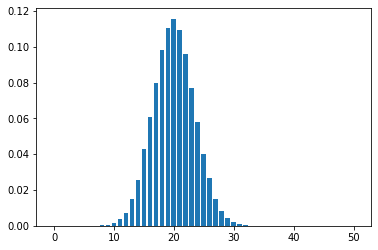

In [33]:
simulation_binomiale(50,0.4,100000)

On observe une sorte de courbe en cloche, centrée autour de $pn$.

Réalisons maintenant un diagramme analogue, en représentant les valeurs exactes des probabilités.

 On commence par écrire une fonction `pascal(n)` qui rend la $n$-ème ligne du triangle de Pascal.

In [34]:
def pascal(n):
    x = [1] + n*[0]
    for i in range(n):
        y = [1]
        for j in range(n):
            y.append(x[j] + x[j+1])
        x = y
    return x

Puis on écrit une fonction `binomiale(n,p)` calculant le vecteur des $B_{n,p}(k)$, et on l'affiche par un diagramme en barres.

In [35]:
def binomiale(n,p):
    x = pascal(n)
    x = [ p**k * (1-p)**(n-k) * x[k] for k in range(n+1) ]
    return x
    
    
def plot_binomiale(n,p):
    plt.bar(range(n+1) , binomiale(n,p))

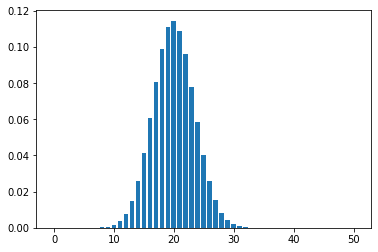

In [36]:
plot_binomiale(50,0.4)

### Tirage sans remise

On a un panier de 10 oeuf, parmi lesquels 5 sont pourris. On prend au hasard 3 oeufs dans ce panier. Bien sûr, quand on prend un oeuf, on ne le remet pas dans le panier ensuite !

On veut connaitre, pour tout $k\in[0,3]$, la probabilité qu'il y ait $k$ oeufs pourris parmi les 3 qui ont été choisis. 

In [37]:
def panier(N):
    l=list(range(10))
    resultats = [0,0,0,0]
    for i in range(N):
        npr.shuffle(l)
        compte = 0
        for k in range(5):
            if l[k] < 3:
                compte += 1
        resultats[compte] += 1
    print([x/N for x in resultats])
 

In [38]:
panier(100000)

[0.08383, 0.41415, 0.41757, 0.08445]


On peut comparer ce résultat à un tirage avec remise : un oeuf pris isolément a une probabilité 0.5 d'être pourri.  La probabilité d'avoir k oeufs pourris dans un tirage avec remise de 3 oeufs est alors :

In [39]:
binomiale(3,0.5)

[0.125, 0.375, 0.375, 0.125]

Pour des petites tailles d'échantillon, comme c'est le cas ici, on voit une différence importante entre ces deux modes de tirages.

### Première apparition d'un motif

On lance indéfiniment une pièce de monnaie équilibrée et on note les résultats. On obtient ainsi une suite de `pile` et de `face`, ou si on préfère de `0` et de `1`.  On se donne un motif constitué de 0 et de 1, par exemple `M = 0010111`. Ce motif apparaitra un jour dans la suite de `0` et de `1` produite par la pièce de monnaie. On appelle temps d'apparition du motif `M` le numéro du lancer qui fait apparaitre pour la première fois `M` dans la liste.

Par exemple, si la suite observée donne :
`000110100101110100...`
on voit que le motif`M` est apparu lorsqu'on a fait le 14-ème tirage. Le temps d'attente lors de cette expérience a donc été `T = 14`.

In [40]:
def temps_apparition(motif):
    l = len(motif)
    suite = ""
    T = 0
    while suite[-l:] != motif:
        tirage = rd.randint(0,1)
        suite += str(tirage)
        T += 1
    return T
        

In [41]:
temps_apparition("011")

4

In [42]:
def moyenne_temps_apparition(motif,N):
    s = 0
    for i in range(N):
        s += temps_apparition(motif)
    return s/N

In [43]:
moyenne_temps_apparition("11",100000)

6.02553

### Comparaison de deux motifs de même taille

On se donne cette fois-ci deux motifs de même longueur. Deux joueurs jouent l'un contre l'autre et choisissent chacun un motif; le joueur dont le motif apparait en premier a gagné.

On veut savoir quel motif doit choisir un joueur pour maximiser sa probabilité de gagner.

In [44]:
def partie(motif1,motif2):
    l = len(motif1)
    suite = ""
    while suite[-l:] not in [motif1, motif2]:
        tirage = rd.randint(0,1)
        suite += str(tirage)
    if suite[-l:] == motif1:
        return 1
    else:
        return 2

In [45]:
def comparaison(motif1,motif2,N):
    n1 = 0
    for i in range(N):
        n1 += (2 - partie(motif1,motif2))
    print(n1/N,1-n1/N)

*Le gain d'un motif sur un autre n'est pas lié à leurs temps d'apparitions moyens :*

In [46]:
comparaison("100","001",100000)

0.7475 0.25249999999999995


In [47]:
moyenne_temps_apparition("100",100000)

7.98376

In [48]:
moyenne_temps_apparition("001",100000)

8.02646

*La relation "gagner contre" n'est pas transitive :*

In [49]:
comparaison("110","100",100000)

0.66767 0.33233


"110" gagne contre "100"

In [50]:
comparaison("100","001",100000)

0.75012 0.24988


"100" gagne contre "001"

In [51]:
comparaison("001","011",100000)

0.66526 0.33474000000000004


"001" gangne contre "011"

In [52]:
comparaison("011","110",100000)

0.74989 0.25011000000000005


et "011" gagne contre "110" !